In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the dataset
df = pd.read_csv("Sales trends.csv")

df.head()

,Month,Product,Category,Sales,Profit
0,Nov,D,Electronics,4272,937
1,Mar,B,Clothing,4926,945
2,Apr,E,Clothing,3419,826
3,Feb,E,Clothing,2891,770
4,Dec,B,Clothing,1684,270


In [3]:
## Sort months for proper ordering:

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

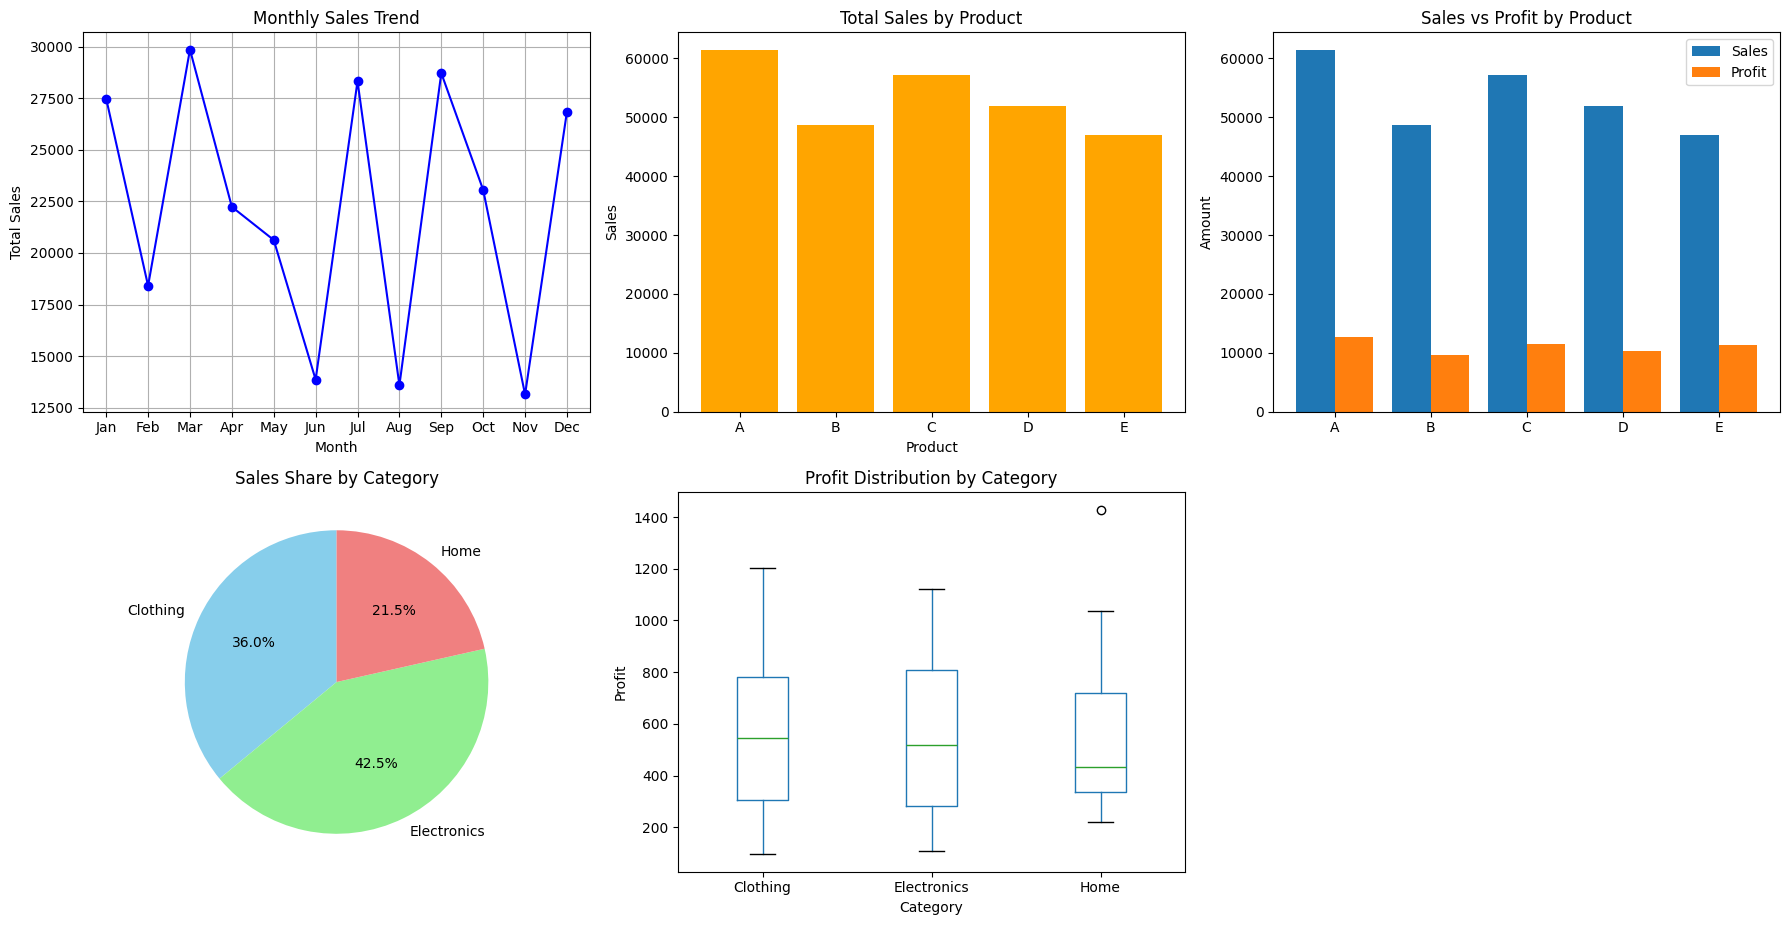

In [13]:
## Create the figure layout:

fig, axes = plt.subplots(2, 3, figsize = (18, 10))
fig.suptitle("Sales Trends & product Performance", fontsize = 18, fontweight = "bold")


## 1. Line Chart - Monthly Sales Trend:

monthly_sales = df.groupby("Month")["Sales"].sum().reindex(month_order)
axes[0, 0].plot(monthly_sales.index, monthly_sales.values, marker = 'o', color = 'b')
axes[0, 0].set_title("Monthly Sales Trend")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Total Sales")
axes[0, 0].grid(True)

## 2. Bar Chart - Sales by Product
product_sales = df.groupby("Product")['Sales'].sum()
axes[0, 1].bar(product_sales.index, product_sales.values, color = "orange")
axes[0, 1].set_title("Total Sales by Product")
axes[0, 1].set_xlabel("Product")
axes[0, 1].set_ylabel("Sales")

## 3. Grouped Bar Chart - Sales vs Profit by Product:
product_perf = df.groupby("Product")[["Sales", "Profit"]].sum()
x = range(len(product_perf))
axes[0, 2].bar([p - 0.2 for p in x], product_perf["Sales"], width = 0.4, label = "Sales")
axes[0, 2].bar([p + 0.2 for p in x], product_perf["Profit"], width = 0.4, label = "Profit")
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(product_perf.index)
axes[0, 2].set_title("Sales vs Profit by Product")
axes[0, 2].set_ylabel("Amount")
axes[0, 2].legend()

## 4. Piechart - Category Share:
category_sales = df.groupby("Category")["Sales"].sum()
axes[1, 0].pie(category_sales.values, labels=category_sales.index,
               autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightgreen", "lightcoral"])
axes[1, 0].set_title("Sales Share by Category")

## Boxplot - Profit Distribution across Categories:
df.boxplot(column = "Profit", by = "Category", ax = axes[1, 1], grid = False)
axes[1,1].set_title("Profit Distribution by Category")
axes[1,1].set_ylabel("Profit")
plt.suptitle("")

## Hide the empty subplot:
axes[1,2].axis("off")

# Final layout:
plt.tight_layout(rect = [0,0,1,0.95])
plt.show()